In [15]:
# !conda install -y networkx
# !conda install -y community
# !conda install -y matplotlib

# !pip install --upgrade bs4
# !pip install --user --upgrade html5lib==1.0b8
# !pip install networkx
# !pip install community
# !pip install matplotlib


bleach 2.1.4 has requirement html5lib!=1.0b1,!=1.0b2,!=1.0b3,!=1.0b4,!=1.0b5,!=1.0b6,!=1.0b7,!=1.0b8,>=0.99999999pre, but you'll have html5lib 1.0b8 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1


In [29]:
import networkx as nx
borders = nx.Graph()
not_borders1 = nx.DiGraph() # Just for our reference 
not_borders2 = nx.MultiGraph() # Just for our reference

In [30]:
borders.add_node("Zimbabwe")
borders.add_nodes_from(["Lugandon", "Zambia", "Portugal", "Kuwait","Colombia"]) 
borders.remove_node("Lugandon")
borders.add_edge("Zambia", "Zimbabwe") 
borders.add_edges_from([("Uganda", "Rwanda"), ("Uganda", "Kenya"),
("Uganda", "South Sudan"), ("Uganda", "Tanzania"), ("Uganda", "Democratic Republic of the Congo")])


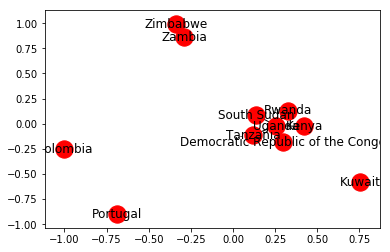

In [33]:
# nx.draw(borders, pos=nx.spring_layout(borders))
nx.draw_networkx(borders)

In [21]:
import bs4 as BeautifulSoup
import urllib.request
import networkx as nx
# import community

URL = "https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_land_borders"
with urllib.request.urlopen(URL) as source:
    soup = BeautifulSoup.BeautifulSoup(source)

/usr/lib/python3/dist-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [22]:
table = soup.findAll("table", {"class": "wikitable sortable"})[0]
table

<table class="wikitable sortable">
<tbody><tr>
<th align="left" rowspan="2" scope="col" valign="top" width="25%;"><div class="mw-collapsible mw-collapsed" style="box-sizing:border-box;width:100%;font-size:95%;padding:4px;border:none;"><div style="font-size:100%;line-height:1.6;font-weight:bold;background:transparent;text-align:center;;height:auto;"><div style="margin-right:4em;line-height:125%;height:auto;">Country or territory</div></div><div class="mw-collapsible-content" style="background:transparent;text-align:left;;">
<center><small><i>(Territories without full sovereignty in italics)</i> <sup class="reference" id="cite_ref-sovereign_2-0"><a href="#cite_note-sovereign-2">[2]</a></sup></small></center></div></div>
</th>
<th colspan="2" scope="col" valign="top" width="17%;">Total length of land borders
</th>
<th align="left" data-sort-type="number" rowspan="2" scope="col" valign="top" width="15%;"><abbr title="Number">No.</abbr> of unique land borders
</th>
<th align="left" data-sor

In [23]:
list(table.findAll("tr")[2:][0].findAll('td')[0].strings)[1]

'Adélie Land'

In [39]:
G = nx.Graph()

for row in table.findAll("tr")[2:]:
    row = row.findAll('td')
    countryA = list(row[0].strings)[1]
    try:
        length = float(row[1].text.replace(",",""))
    except:
        length = 0.0
    if countryA[0] != '[':
        G.add_node(countryA)
        G.node[countryA]["l"] = length
        for countryB in [x.string for x in row[4].findAll('a') 
                         if x["href"][0] != '#' 
                         and x.string != None 
                         and x.string[0] != '[']:
            G.add_edge(countryA, countryB)
        
# G.remove_nodes_from(nx.isolates(G))
# G.remove_nodes_from(["Palestine", "Antártica Chilena Province",
#                      "West Bank", "Gaza Strip", "European Union"])

# part = community.best_partition(G)
# community.modularity(part, G)

# with open("borders-1.graphml", "wb") as graph:
# 	nx.write_graphml(G, graph)

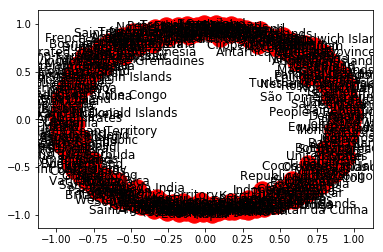

In [45]:
import matplotlib as plt

# nx.draw(G)
nx.draw_networkx(G, pos=nx.spring_layout(G))
# nx.draw_networkx_edges(G,pos=nx.spring_layout(G))
# nx.draw_networkx_edge_labels(G,pos=nx.circular_layout(G))
# plt.show()